# 6.4.2 XGBoost 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/2017DC1-all.csv')
                              # 연속변수 타겟 VALP를 가지고 스케일 조정이 되지 않은 데이터셋인 house-unscaled-VALP.csv 불러오기
df.shape

(8751, 12)

In [ ]:
df.head(3)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rented Bike B,Date,Hour,Seasons,Functioning Day,Holiday
0,254,-5.2,37.0,2.2,2000,0.0,0.0,0.0,0.0,3.0,1.0,1.0
1,204,-5.5,38.0,0.8,2000,0.0,0.0,0.0,1.0,3.0,1.0,1.0
2,173,-6.0,39.0,1.0,2000,0.0,0.0,0.0,2.0,3.0,1.0,1.0


In [ ]:
df.drop(['Rented Bike B'], axis=1, inplace=True)   # 이진값 타겟변수 VALP_B1를 제외
df.shape

(8751, 11)

In [ ]:
# 참조 코딩
df.head(3)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Date,Hour,Seasons,Functioning Day,Holiday
0,254,-5.2,37.0,2.2,2000,0.0,0.0,0.0,3.0,1.0,1.0
1,204,-5.5,38.0,0.8,2000,0.0,0.0,1.0,3.0,1.0,1.0
2,173,-6.0,39.0,1.0,2000,0.0,0.0,2.0,3.0,1.0,1.0


In [ ]:
data = df.drop(['Rented Bike Count'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['Rented Bike Count']                # 타겟변수만 target에 저장

# 50:50 데이터 변환
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

In [ ]:
# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))


r2: 0.84832


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [16], 'min_child_weight': [4],
                         'n_estimators': [1000], 'subsample': [0.8, 0.9]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.8}


In [ ]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.85388


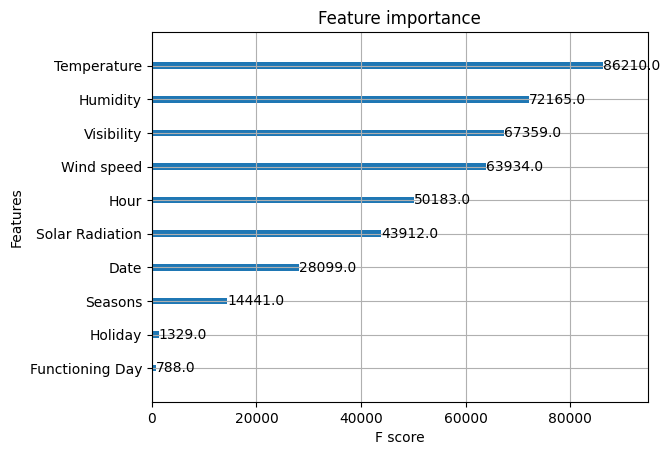

In [ ]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10);

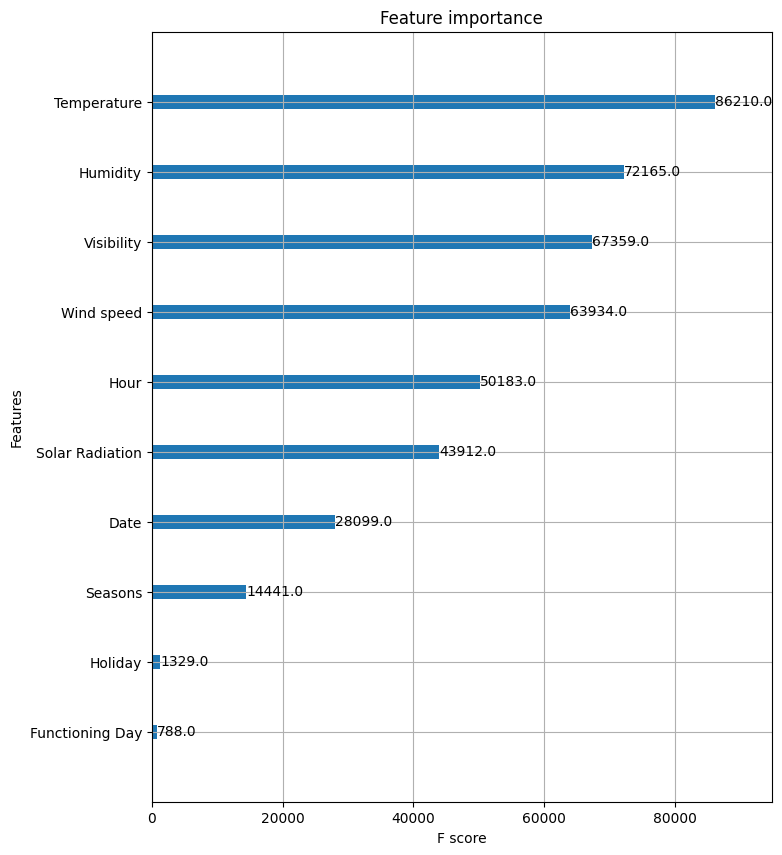

In [ ]:
# 참조 코딩
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

# 6.4.3 LightGBM 모델

In [ ]:
# 기본 lGBMRegressor 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state=0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 4375, number of used features: 10
[LightGBM] [Info] Start training from score 700.089143
r2: 0.86481


In [ ]:
#그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 4375, number of used features: 10
[LightGBM] [Info] Start training from score 700.089143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.1, 0.15, 0.2], 'max_depth': [11],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'subsample': [0.3, 0.4]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [ ]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
r2: 0.85728


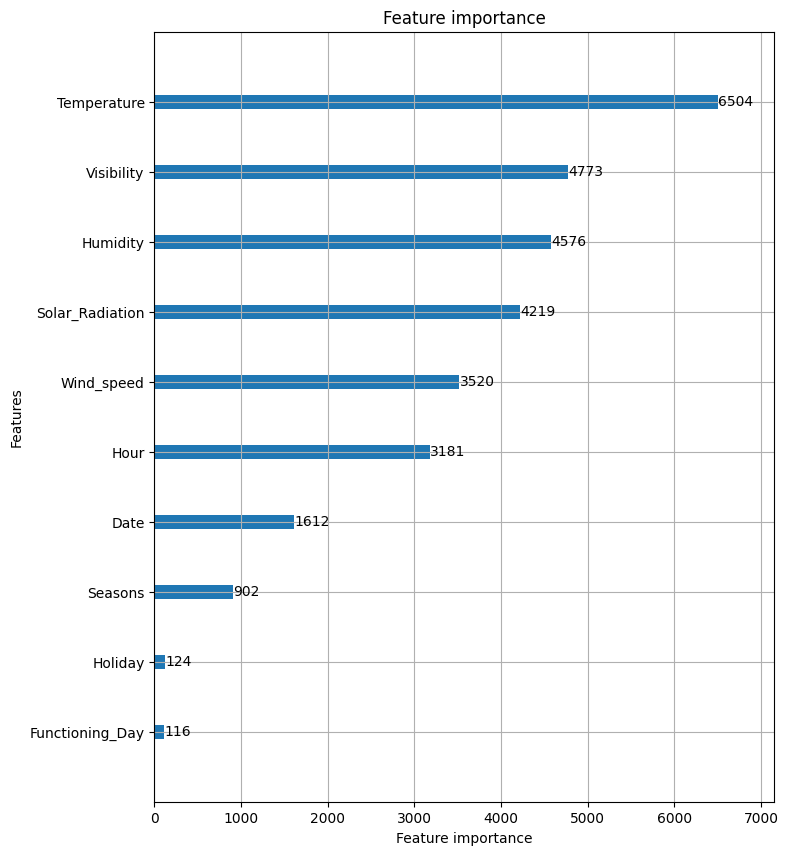

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

# 6.5 스태킹 모델(앙상블)

In [ ]:
model_xgb = xgb_grid.best_estimator_
pred_xgb = model_xgb.predict(X_test)

model_lgb = lgb_grid.best_estimator_
pred_lgb = model_lgb.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
from sklearn.metrics import r2_score

pred = 0.5*pred_xgb + 0.5*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.86277


In [ ]:
# 참조 코딩
pred = 0.6*pred_xgb + 0.4*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.86215


In [ ]:
# 참조 코딩
pred = 0.7*pred_xgb + 0.3*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.86094


In [ ]:
# 참조 코딩
pred = 0.8*pred_xgb + 0.2*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.85917


In [ ]:
pred = 0.9*pred_xgb + 0.1*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.85681
